<a href="https://colab.research.google.com/github/AlexisGuillotin/Bitcoin-Cash-Challenge/blob/main/Daily_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import packages

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery
import seaborn as sns

Connect to Big Query project

In [28]:
client = bigquery.Client(project='bitcoin-cash-challenge-381520', location='US')
auth.authenticate_user()

Query the table and store the results in a pandas dataframe

In [29]:
query = """
SELECT 
  block_date, 
  SUM(input_balance) as input_balance,
  SUM(output_balance) as output_balance
FROM 
  `bitcoin-cash-challenge-381520.dbt_aguillotin.DatamartTable_transactions`
GROUP BY 
  block_date
ORDER BY 
  block_date ASC
"""
df = client.query(query).to_dataframe()

Processing DataFrame, add a 'global_instance' column based on income - outcome

In [30]:
# Convert block_date column to datetime type
df['block_date'] = pd.to_datetime(df['block_date'])

# Set block_date as the index of the dataframe
df.set_index('block_date', inplace=True)

# Compute the daily global balance
df['global_balance'] = df['input_balance'] - df['output_balance']

# Resample the data to daily frequency to fill in missing dates, if any
df = df.resample('D').last().fillna(0)

Sample of the DataFrame

In [39]:
df = df.drop(df[df.input_balance == 0].index)
df = df.drop(df[df.output_balance == 0].index)
df.head(10)

,input_balance,output_balance,global_balance
block_date,,,
2023-02-01,16559993994,16559991489,2505
2023-02-10,5075635650324,5075635271124,379200
2023-02-13,67014000000,67013625400,374600
2023-02-14,14895117,14762053,133064
2023-02-16,744779055280,744779047040,8240
2023-02-23,218220,217192,1028
2023-02-24,18530,18018,512
2023-02-25,135120113060,135120097620,15440
2023-02-28,36713092740,36709529180,3563560


Plot each graph using seaborn package

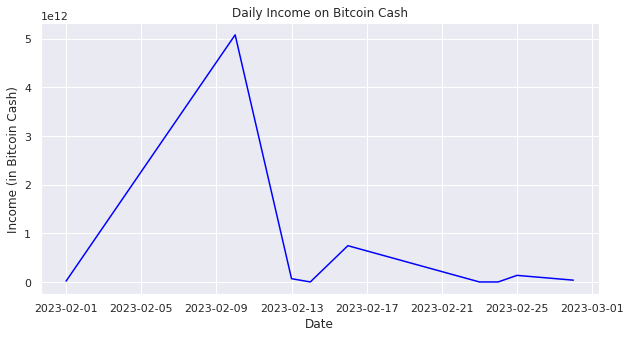

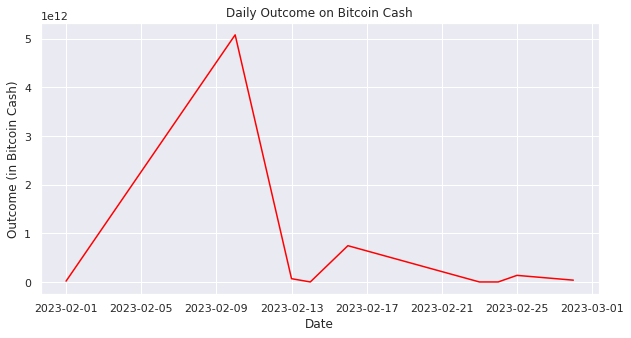

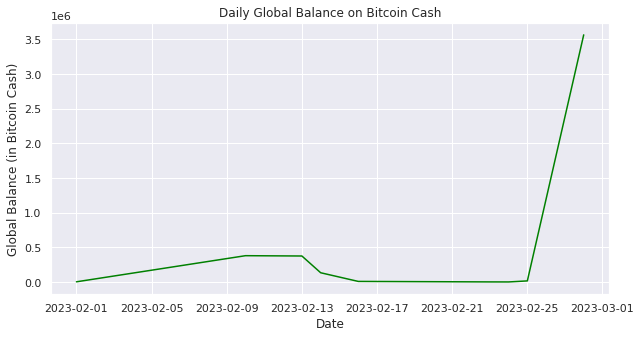

In [40]:
# Plot the daily income
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="block_date", y="input_balance", color='blue')
plt.title('Daily Income on Bitcoin Cash')
plt.xlabel('Date')
plt.ylabel('Income (in Bitcoin Cash)')
plt.show()

# Plot the daily outcome
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="block_date", y="output_balance", color='red')
plt.title('Daily Outcome on Bitcoin Cash')
plt.xlabel('Date')
plt.ylabel('Outcome (in Bitcoin Cash)')
plt.show()

# Plot the daily global balance
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df.index, y="global_balance", color='green')
plt.title('Daily Global Balance on Bitcoin Cash')
plt.xlabel('Date')
plt.ylabel('Global Balance (in Bitcoin Cash)')
plt.show()